## 1. Load packages and data

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
def _revrt(X,m=None):
    """
    Inverse of forrt. Equivalent to Munro (1976) REVRT routine.
    """
    if m is None:
        m = len(X)
    i = int(m // 2+1)
    y = X[:i] + np.r_[0,X[i:],0]*1j
    return np.fft.irfft(y)*m

from statsmodels.nonparametric import kdetools
# replace the implementation with new method.
kdetools.revrt = _revrt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
customer = pd.read_csv('customers_kmeans.csv')
customer = customer.drop('gender', axis = 1)

## 2.Sihouette analysis and Kmeans cluster

In [4]:
X = np.array(customer)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For n_clusters = 2 The average silhouette_score is : 0.514383891432


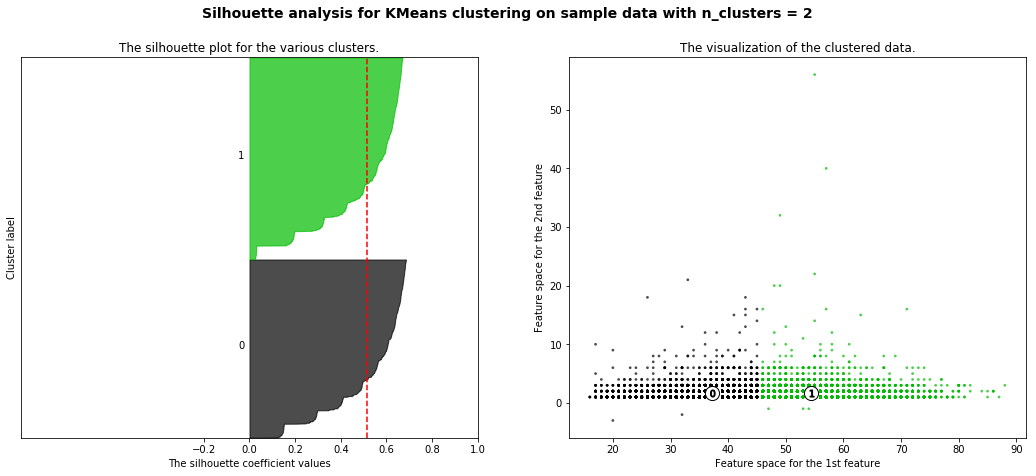

For n_clusters = 3 The average silhouette_score is : 0.466214369973


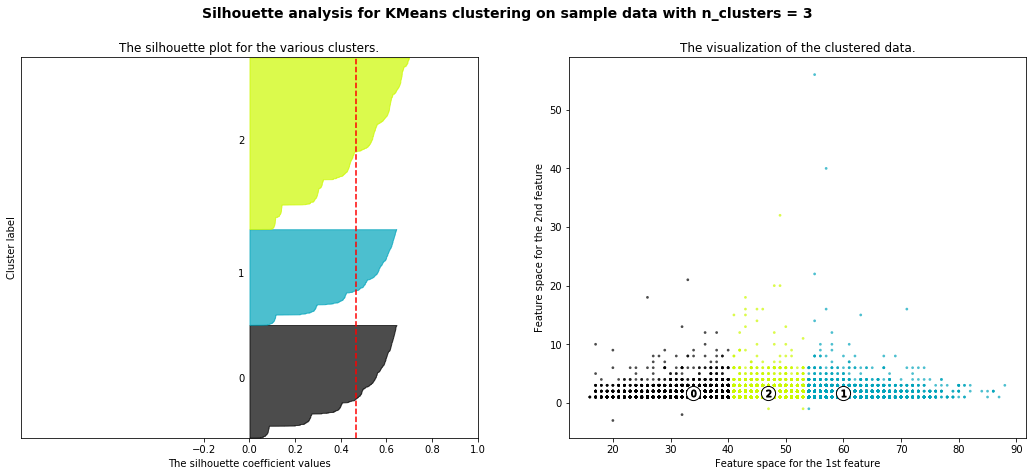

For n_clusters = 4 The average silhouette_score is : 0.433009585563


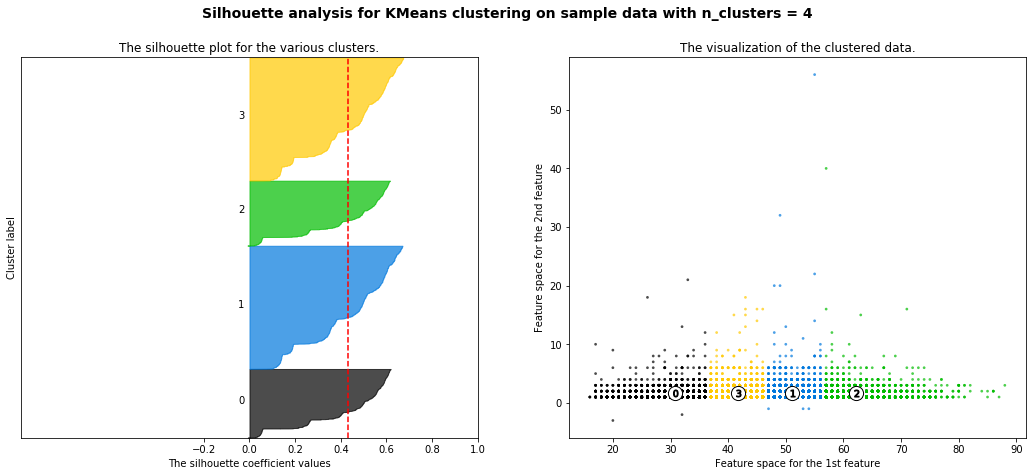

For n_clusters = 5 The average silhouette_score is : 0.407032586995


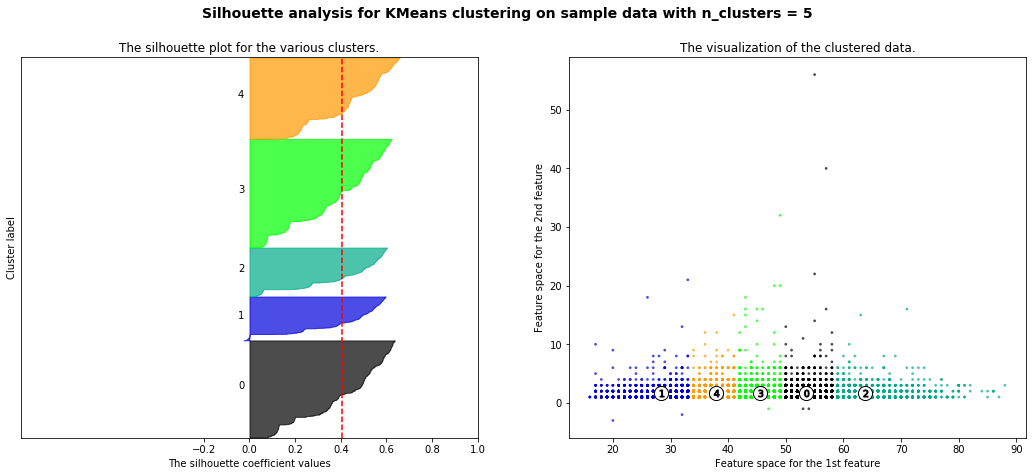

For n_clusters = 6 The average silhouette_score is : 0.38986173631


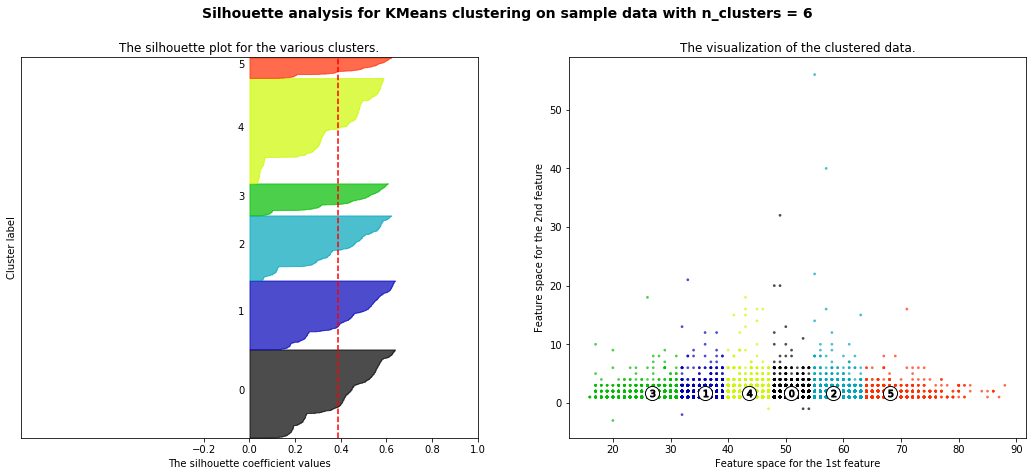

For n_clusters = 7 The average silhouette_score is : 0.379846522378


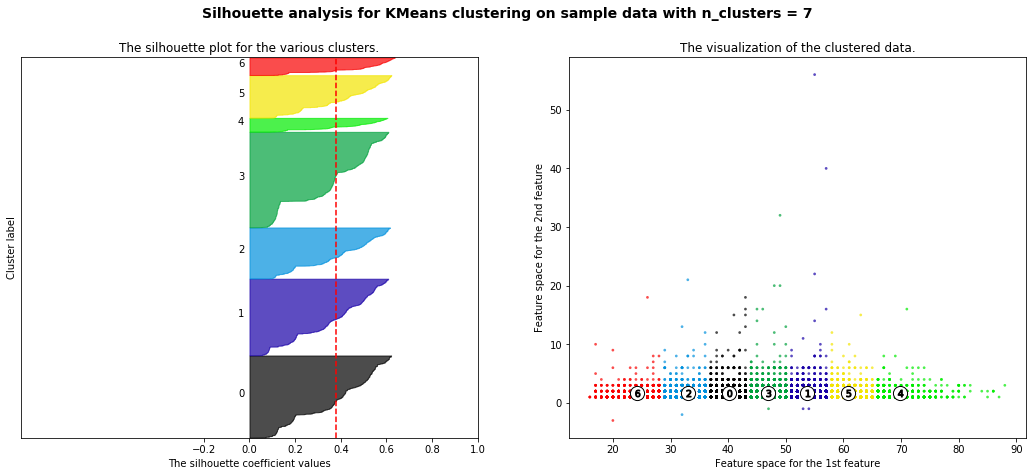

For n_clusters = 8 The average silhouette_score is : 0.347800837827


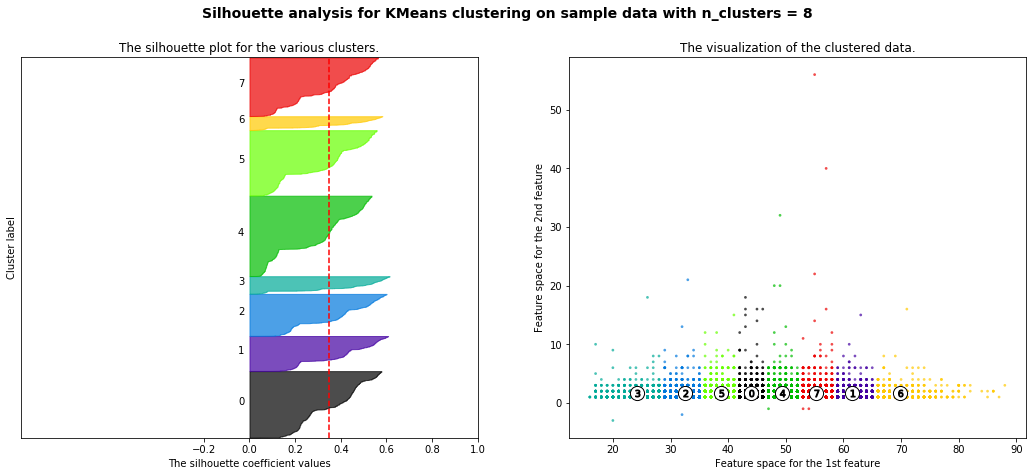

In [5]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

When n_cluster = 2, points are furthest away from neighboring clusters. Therefore, we chose 2 to be the number of clusters.

In [6]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X)

## 3. Visualization of clusters

In [7]:
customer['Label'] = cluster_labels
customer.groupby('Label').describe()

age                                                      divi_e  \
         count       mean       std   min   25%   50%   75%   max    count   
Label                                                                        
0       9497.0  37.237549  6.165354  16.0  34.0  39.0  42.0  45.0   9497.0   
1      10760.0  54.374442  6.594170  46.0  49.0  53.0  58.0  88.0  10760.0   

                 ...  unit_promo      unit_sale                            \
           mean  ...         75%  max     count      mean       std   min   
Label            ...                                                        
0      0.209961  ...         0.0  0.0    9497.0  2.739451  1.102185  0.81   
1      0.214777  ...         0.0  0.0   10760.0  2.742436  1.100210  0.69   

                               
        25%   50%   75%   max  
Label                          
0      1.82  2.65  3.66  5.49  
1      1.82  2.73  3.66  5.49  

[2 rows x 64 columns]

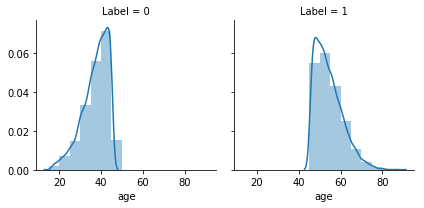

In [15]:
plt.clf()
g_age = sns.FacetGrid(customer, col="Label")
g_age = g_age.map(sns.distplot, 'age', bins = np.arange(15, 90, 5))
plt.show()

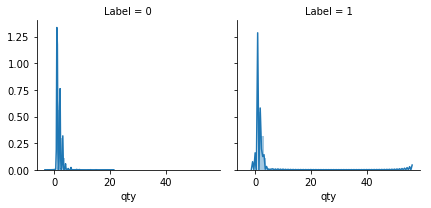

In [14]:
g_qty = sns.FacetGrid(customer, col="Label")
g_qty = g_qty.map(sns.distplot, 'qty', bins = np.arange(0, 10, 1))
plt.show()

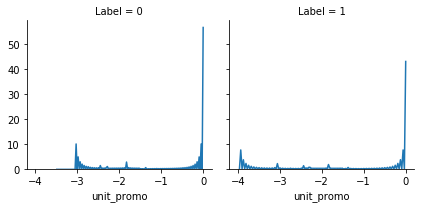

In [13]:
g_promo = sns.FacetGrid(customer, col="Label")
g_promo = g_promo.map(sns.distplot, 'unit_promo', bins = np.arange(-4, 0, 0.5))
plt.show()

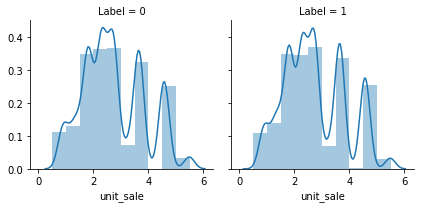

In [12]:
g_sale = sns.FacetGrid(customer, col="Label")
g_sale = g_sale.map(sns.distplot, 'unit_sale', bins = np.arange(0, 6, 0.5))
plt.show()